# Component parameter files
Component parameters can be loaded from file (.toml format) rather than specifiying them in code when building a system. This enables a component library to be created from .toml files. This notebook demonstrates the component parameter files for each of the component types in `sysLoss`.

In [1]:
# This cell can be removed, it is only used for running the notebook during Sphinx documentation build.
import sys, os
if os.getcwd().replace('\\', '/').endswith("/docs/nb"):
    sys.path.insert(0, os.path.abspath(os.path.join("../../src")))

Import packages:

In [2]:
from sysloss.components import *
from sysloss.system import System
import toml

## About the .toml format
The general format of a component parameter file consists of two tables:
  * \[\<component type\>] 
    * component specific parameters
  * \[limits] (optional)
    * limits for input and output voltages and currents

`sysLoss` will silently ignore surplus parameters in the .toml file. Parameter files for each of the component types are detailed below.
```{tip}
TOML is picky on array values - a mix of integer and floating point values are not allowed. Always use floats!  
```

## Source

In [3]:
source_params = """[source]
vo = 3.3   # output voltage (mandatory)
rs = 0.007 # series resistance (optional)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 1000000.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1.0]
"""

with open("source.toml", "w") as f:
    f.write(source_params)

sys = System("Test toml", Source.from_file("My source", fname="source.toml"))

## Converter

In [4]:
conv_params = """[converter]
vo = 2.5   # output voltage (mandatory)
iq = 1.2e-6 # Quiescent (no-load) current (optional)
iis = 0.33e-6 # Sleep (shut-down) current (optional)
#eff = 0.87 # efficiency (mandatory)
# efficiency can optionally be specified as 1D interpolation data:
#[converter.eff]
#vi = [3.3]
#io = [0.1, 0.5, 0.9]
#eff = [[0.55, 0.78, 0.92]]
# or as 2D interpolation data:
[converter.eff]
vi = [3.3, 5.0, 12.0]
io = [0.1, 0.5, 0.9]
eff = [[0.55, 0.78, 0.92], [0.5, 0.74, 0.83], [0.4, 0.6, 0.766]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 2.7, 16.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1.0]
"""

with open("converter.toml", "w") as f:
    f.write(conv_params)

sys.add_comp("My source", comp=Converter.from_file("Buck 2.5V", fname="converter.toml"))

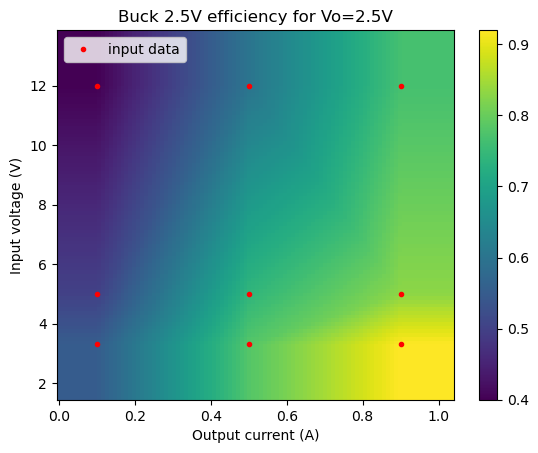

In [5]:
sys.plot_interp("Buck 2.5V");

## LinReg

In [6]:
ldo_params = """[linreg]
vo = 1.8   # output voltage (mandatory)
vdrop = 0.25 # dropout voltage (optional)
iis = 0.33e-6 # Sleep (shut-down) current (optional)
#iq = 1.2e-6 # Ground current (optional)
# ground current (iq) can optionally be specified as 1D interpolation data:
#[linreg.iq]
#vi = [5.0]
#io = [0.0, 0.05, 0.1]
#iq = [[2.0e-6, 0.5e-3, 0.85e-3]]
# or as 2D interpolation data:
[linreg.iq]
vi = [2.5, 5.0]
io = [0.0, 0.05, 0.1]
iq = [[1.2e-6, 0.34e-3, 0.64e-3], [2.0e-6, 0.5e-3, 0.85e-3]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 2.7, 24.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 0.25]
"""

with open("linreg.toml", "w") as f:
    f.write(ldo_params)

sys.add_comp("My source", comp=LinReg.from_file("LDO 1.8V", fname="linreg.toml"))

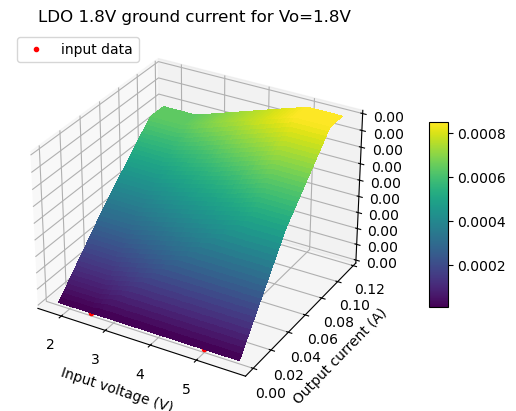

In [7]:
sys.plot_interp("LDO 1.8V", plot3d=True);

## RLoss

In [8]:
rloss_params = """[rloss]
rs = 7.5   # series resistance (mandatory)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 1000000.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1000000.0]
"""

with open("rloss.toml", "w") as f:
    f.write(rloss_params)

sys.add_comp("Buck 2.5V", comp=RLoss.from_file("Filter", fname="rloss.toml"))

## VLoss

In [9]:
vloss_params = """[vloss]
#vdrop = 0.33   # voltage drop (mandatory)
# voltage drop can optionally be specified as 1D interpolation data:
[vloss.vdrop]
vi = [3.3]
io = [0.1, 0.5, 0.9]
vdrop = [[0.23, 0.41, 0.477]]
# or as 2D interpolation data:
#[vloss.vdrop]
#vi = [3.3, 5.0, 12.0]
#io = [0.1, 0.5, 0.9]
#vdrop = [[0.23, 0.34, 0.477], [0.27, 0.39, 0.51], [0.3, 0.41, 0.57]]

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 200.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 0.75]
"""

with open("vloss.toml", "w") as f:
    f.write(vloss_params)

sys.add_comp("Buck 2.5V", comp=VLoss.from_file("Diode", fname="vloss.toml"))

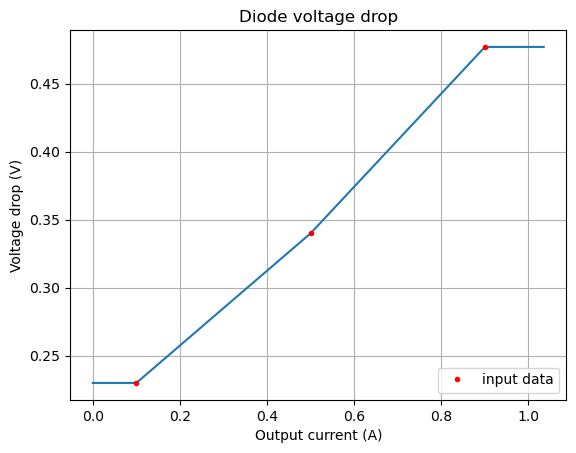

In [10]:
sys.plot_interp("Diode");

## PLoad

In [11]:
pload_params = """[pload]
pwr = 0.5   # load power (W) (mandatory)
pwrs = 1e-3 # sleep mode load power (optional)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 24.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1000000.0]
"""

with open("pload.toml", "w") as f:
    f.write(pload_params)

sys.add_comp("LDO 1.8V", comp=PLoad.from_file("MCU", fname="pload.toml"))

## ILoad

In [12]:
iload_params = """[iload]
ii = 0.125   # load current (A) (mandatory)
iis = 1e-5 # sleep mode load current (optional)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 24.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1000000.0]
"""

with open("iload.toml", "w") as f:
    f.write(iload_params)

sys.add_comp("Filter", comp=ILoad.from_file("Load", fname="iload.toml"))

## RLoad

In [13]:
rload_params = """[rload]
rs = 12.0   # series resistance (mandatory)

[limits] # optional, any combination of below parameters can be specificed
vi = [ 0.0, 1000000.0] 
vo = [ 0.0, 1000000.0]
ii = [ 0.0, 1000000.0]
io = [ 0.0, 1000000.0]
"""

with open("rload.toml", "w") as f:
    f.write(rload_params)

sys.add_comp("Diode", comp=RLoad.from_file("Resistor", fname="rload.toml"))

## Summary
All component parameters can be loaded from .toml files.

In [14]:
sys.params(limits=True)

,Component,Type,Parent,vo (V),vdrop (V),rs (Ohm),eff (%),iq (A),ii (A),iis (A),pwr (W),pwrs (W),vi limits (V),vo limits (V),ii limits (A),io limits (A)
0,My source,SOURCE,,3.3,,0.007,,,,,,,"[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1.0]"
1,LDO 1.8V,LINREG,My source,1.8,0.25,,,interp,,0.0,,,"[2.7, 24.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 0.25]"
2,MCU,LOAD,LDO 1.8V,,,,,,,,0.5,0.001,"[0.0, 24.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]"
3,Buck 2.5V,CONVERTER,My source,2.5,,,interp,0.000001,,0.0,,,"[2.7, 16.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1.0]"
4,Diode,SLOSS,Buck 2.5V,,interp,,,,,,,,"[0.0, 200.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 0.75]"
5,Resistor,LOAD,Diode,,,12.0,,,,,,,"[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]"
6,Filter,SLOSS,Buck 2.5V,,,7.5,,,,,,,"[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]"
7,Load,LOAD,Filter,,,,,,0.125,0.00001,,,"[0.0, 24.0]","[0.0, 1000000.0]","[0.0, 1000000.0]","[0.0, 1000000.0]"


In [15]:
sys.tree()

Test toml
└── My source
    ├── LDO 1.8V
    │   └── MCU
    └── Buck 2.5V
        ├── Diode
        │   └── Resistor
        └── Filter
            └── Load

In [16]:
sys.solve()

,Component,Type,Parent,Vin (V),Vout (V),Iin (A),Iout (A),Power (W),Loss (W),Efficiency (%),Warnings
0,My source,SOURCE,,3.3,3.295584,0.63088,0.63088,2.081903,0.002786,99.866177,
1,LDO 1.8V,LINREG,My source,3.295584,1.8,0.278485,0.277778,0.917769,0.417769,54.479918,io
2,MCU,LOAD,LDO 1.8V,1.8,0.0,0.277778,0.0,0.5,0.0,100.0,
3,Buck 2.5V,CONVERTER,My source,3.295584,2.5,0.352395,0.312169,1.161348,0.380925,67.19972,
4,Diode,SLOSS,Buck 2.5V,2.5,2.246029,0.187169,0.187169,0.467923,0.047536,89.841141,
5,Resistor,LOAD,Diode,2.246029,0.0,0.187169,0.0,0.420387,0.0,100.0,
6,Filter,SLOSS,Buck 2.5V,2.5,1.5625,0.125,0.125,0.3125,0.117188,62.5,
7,Load,LOAD,Filter,1.5625,0.0,0.125,0.0,0.195312,0.0,100.0,
8,System total,,,,,,0.63088,2.081903,0.966204,53.590357,Yes
